# Project: No Show Appointments

## Introduction

#### The structure of the dataset

There are a little more than 110k appointments information which are divided into 14 columns. These columns provide data about the patient, their issues and whether or not they attended their appointment.

#### What are the main features of interest in the dataset

I am mostly interested in finding out the reasons of why a patient might miss their appointment and which factors inluence those events.

<a id='wrangling'></a>
## Data Wrangling

### Gather

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
# Load the dataset
appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Assess and note issues

In [3]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
appointments.shape

(110527, 14)

In [5]:
appointments.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
appointments.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
appointments.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [9]:
appointments.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [10]:
appointments.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [11]:
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Issues
- uppercase column names
- incorrectly spelled column names (Hipertension, Handcap)
- patientid, appointmentid, AppoinmentDay, ScheduledDay, no-show are not consistent with SMS_recieved
- incorrect patient id dtype
- scheduleday and appointmentday columns are strings
- incorrect gender dtype
- confusing values for No-show column
- other numbers are given for True (1) or False (0) for Handicap column - 2, 3, 4
- negative number (-1) for age
- raw integer values for age are not very useful to see different trends
- the placement of issue types (hypertension, diabetes, alcoholism, handicap) makes visualisations difficult
- surprising appointment days. There seems to be only 27 unique dates for appointments. This issue will be addressed after converting schedule and appointment columns to datetime

### Data Cleaning

In [12]:
# Make a copy of the dataset
copy = appointments.copy()

#### Uppercase column namese

In [13]:
# Turn all column names to lowercase
appointments.columns = appointments.columns.str.lower()
# Test
appointments.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Incorrectly spelled column names (Hipertension, Handcap)

In [14]:
# Rename the above columns
appointments.rename(columns={'hipertension': 'hypertension',
                             'handcap': 'handicap'}, inplace=True)
# Test
appointments.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no-show'],
      dtype='object')

#### Patientid, appointmentid, AppoinmentDay, ScheduledDay, no-show are not consistent with SMS_recieved

In [15]:
# Rename the above columns
appointments.rename(columns={'appointmentday': 'appointment_day',
 'scheduledday': 'scheduled_day', 'patientid': 'patient_id',
    'appointmentid': 'appointment_id', 'no-show': 'no_show'}, inplace=True)
# Test
appointments.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

#### Other numbers are given for True (1) or False (0) for Handicap column - 2, 3, 4

In [16]:
# Replace all the values with ones if not 0
appointments.handicap = appointments.handicap.apply(
            lambda x: 1 if x != 0 else x).astype(dtype=np.int64)

# Test
appointments.handicap.value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

#### Raw integer values are not very useful to see different trends

I will create a custom function to divide the age column into different age groups in a new column

In [17]:
def group_age(age):
    """Groups the ages into 6 different groups:
    Children, Teenagers, Yound Adults, Middle Age Adults, Elderly, over 90"""
    if 0 <= age < 12:
        return 'children'
    elif 12 <= age < 19:
        return 'teenagers'
    elif 19 <= age < 35:
        return 'young adults'
    elif 35 <= age < 60:
        return 'middle age adults'
    elif 60 <= age < 90:
        return 'elderly'
    else:
        return 'over 90'

In [18]:
# Run the above function
appointments['age_groups'] = appointments.age.apply(group_age)

# Test
appointments.sample(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_groups
102219,9.232457e+12,5737274,F,2016-05-25T09:24:54Z,2016-06-07T00:00:00Z,58,CRUZAMENTO,0,1,0,0,0,1,No,middle age adults
93888,3.546672e+14,5783450,M,2016-06-07T13:56:33Z,2016-06-07T00:00:00Z,47,SANTA MARTHA,0,0,0,0,1,0,No,middle age adults
57288,2.681324e+14,5748412,F,2016-05-31T07:01:40Z,2016-05-31T00:00:00Z,45,MARIA ORTIZ,0,0,0,0,0,0,No,middle age adults
73767,7.699117e+11,5706645,M,2016-05-17T08:37:57Z,2016-05-20T00:00:00Z,45,SÃO PEDRO,0,1,0,0,0,0,No,middle age adults
15162,6.984379e+11,5682333,M,2016-05-10T16:16:49Z,2016-05-17T00:00:00Z,52,CENTRO,0,0,0,0,0,0,No,middle age adults
55990,1.324476e+11,5669120,F,2016-05-06T10:22:06Z,2016-05-20T00:00:00Z,11,SÃO JOSÉ,0,0,0,0,0,0,No,children
90910,9.934391e+13,5780296,F,2016-06-07T07:52:07Z,2016-06-07T00:00:00Z,53,SANTA LÚCIA,0,0,0,0,0,0,No,middle age adults
85654,3.464184e+13,5755333,F,2016-06-01T07:17:34Z,2016-06-07T00:00:00Z,55,ILHA DO PRÍNCIPE,0,0,0,0,0,1,No,middle age adults
68225,5.428677e+10,5581171,M,2016-04-14T07:44:36Z,2016-05-30T00:00:00Z,62,ANDORINHAS,0,1,1,0,0,0,No,elderly
34027,6.328428e+14,5716769,M,2016-05-19T07:11:59Z,2016-05-19T00:00:00Z,49,GURIGICA,1,0,0,0,0,0,No,middle age adults


#### The placement of issue types (hypertension, diabetes, alcoholism, handicap) makes visualisations difficult

In [19]:
def group_issues(df):
    """Assigns an issue label for every patient who had an appointment.
       If no or multiple issues, the function returns "none" or 
       "multiple" accordingly
    """
    # Create a new column for the new variable
    df['issue'] = (df.hypertension + df.diabetes + df.alcoholism + df.handicap).astype(np.int64)
    
    # Convert 0s to 'none' and values greater than 1 to 'multiple'
    df.issue = df.issue.apply(lambda x: 'none' if x == 0 else 'multiple' if x > 1 else x)

    # Convert the remaining records (patiens with only one issue) 
    # to issue name
    for i in range(df.shape[0]):
        if df.iloc[i].issue == 1 and df.iloc[i].hypertension == 1:
            df.loc[i, 'issue'] = 'hypertension'
        elif df.iloc[i].issue == 1 and df.iloc[i].diabetes == 1:
            df.loc[i, 'issue'] = 'diabetes'
        elif df.iloc[i].issue == 1 and df.iloc[i].alcoholism == 1:
            df.loc[i, 'issue'] = 'alcoholism'
        elif df.iloc[i].issue == 1 and df.iloc[i].handicap == 1:
            df.loc[i, 'issue'] = 'handicap'

In [20]:
# Run the above function on the dataframe to get issue groups
group_issues(appointments)

In [21]:
# Test
appointments.groupby('issue').issue.value_counts()

issue         issue       
alcoholism    alcoholism       1922
diabetes      diabetes         1341
handicap      handicap         1197
hypertension  hypertension    13663
multiple      multiple         8289
none          none            84115
Name: issue, dtype: int64

#### Incorrect patient id dtype

In [22]:
# Set the datatype of patient id to int
# I used string manipulation to convert patient ids from scientific notation to
# string, then got rid of all decimals. If works correctly, it still should give
# us the same number of unique patient ids
appointments.patient_id = appointments.patient_id.astype(str).str.strip('.0').str.replace('.', '').astype(dtype=np.int64)

# Test
appointments.patient_id.dtype, appointments.patient_id.nunique()

(dtype('int64'), 62299)

#### Scheduled_day and appointment_day columns are strings

In [23]:
# Convert columns to datetime
appointments['scheduled_day'] = pd.to_datetime(appointments['scheduled_day'])
appointments['appointment_day'] = pd.to_datetime(appointments['appointment_day'])

# Test
appointments.dtypes

patient_id                       int64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
age_groups                      object
issue                           object
dtype: object

#### Incorrect gender dtype

In [24]:
# Convert gender column to categorical dtype
appointments.gender = appointments.gender.astype(dtype='category')

# Test
appointments.gender.dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

#### String values for no_show column

In [25]:
# First, this column uses yes or no in a confusing manner. Let's fix that
# Also, change the column name to a more intuitive one
appointments.no_show = appointments.no_show.apply(
                                lambda x: "Yes" if x == 'No' else 'No')

appointments.rename(columns={'no_show': 'attended'}, inplace=True)

# Now, convert them to 0s and 1s
appointments.attended = appointments.attended.apply(
                       lambda x: 1 if x == 'Yes' else 0)

# Test
appointments.attended.value_counts()

1    88208
0    22319
Name: attended, dtype: int64

#### Negative number (-1) for age

In [26]:
# Drop the row with negative age
negative_index = appointments[appointments.age == -1].index
appointments.drop(negative_index, inplace=True)

# Test
appointments.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

#### Surprising appointment days. There seems to be only 27 unique dates for appointments. This issue will be addressed after converting schedule and appointment columns to datetime

In [27]:
(appointments.appointment_day - appointments.scheduled_day).astype(str).str.contains('-').sum()

38567

There seems to be almost 39k appointment records which had schedule day later than appointment day which does not make sense (patients should first schedule, then come to appointments). Therefore, I am going look at all of the records with appointment day happening before schedule day.

In [28]:
appointments[appointments.appointment_day < appointments.scheduled_day]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,age_groups,issue
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,elderly,hypertension
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,middle age adults,none
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,elderly,none
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,children,none
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,middle age adults,multiple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,823599626588,5786742,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,1,teenagers,none
110512,98762456447375,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,1,middle age adults,none
110513,86747784995281,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,1,children,none
110514,2695685177138,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,1,middle age adults,none


As can be seen from above, there were patients who attended their appointments but had their appointments earlier than their schedule day. So, we can only assume that it was just some mistaking when collecting the data, but we have to make sure. Before dropping these records, just to be safe, I am going to leave out the records which had -1 day difference, because that could mean the appointment might have happened on the schedule day (even though there is a negative hour difference)

In [29]:
appointments['difference'] = appointments.appointment_day - appointments.scheduled_day

In [30]:
problematic_appoints = appointments[appointments.difference < datetime.timedelta(days=-1)]
problematic_appoints

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,age_groups,issue,difference
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,0,middle age adults,handicap,-2 days +13:08:07
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,young adults,handicap,-2 days +09:09:19
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,0,young adults,none,-2 days +10:16:02
71533,998231581612122,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,elderly,none,-7 days +10:10:40
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,0,children,none,-2 days +17:09:03


Now we have 5 patients which has the same issue as above but also, did not attend their appointment. I drop those:

In [31]:
appointments.drop(problematic_appoints.index, inplace=True)

# Test
appointments.shape

(110521, 17)

In [32]:
# Drop the difference column since we do not need it anymore
appointments.drop('difference', axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

First, I am going to look at the distribution of age groups

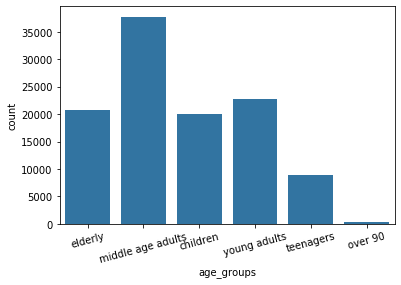

In [33]:
base_color = sb.color_palette()[0]
sb.countplot(data=appointments, x='age_groups', color=base_color)
plt.xticks(rotation=15);

It is clear from above that middle aged adults represent the majority of patients, while there are very few people over 90s

Now, let's look at the distribution of different issues.

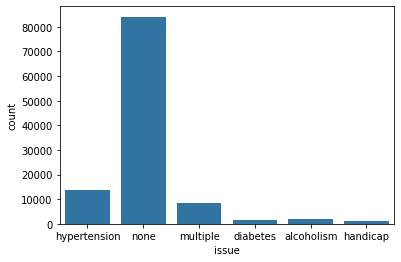

In [34]:
sb.countplot(data=appointments, x='issue', color=base_color);

The above countplot reveals that there were much more patients who did not have any issues when they scheduled. Among patients, hypertension seems to be the most common disease, followed by patients who have multiple issues.

I expect that the two of the main reasons of why patients missed their appointments are age and their health issues. After I drop columns which I no longer have use for, I will start comparing patients who missed and did not miss appointments agains those two variables.

In [35]:
appointments.drop(['appointment_id', 'scheduled_day',
                   'appointment_day', 'age', 'neighbourhood', 'hypertension',
                  'diabetes', 'alcoholism', 'handicap', 'gender'], axis=1, inplace=True)

In [36]:
# First look at the overall proportion of people who attended their appointments
overall_attendance_prop = appointments.attended.mean()

In [37]:
# Take a sample from the datababse to reduce computation time
subset_appointments = appointments.sample(10000, replace=False)

In [38]:
# Now create masks for attendance
attended = subset_appointments.attended == True
not_attended = subset_appointments.attended == False

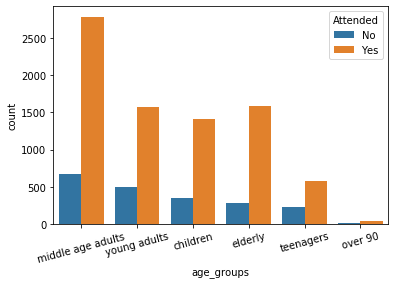

In [39]:
# Plot the difference in attendance between age groups
sb.countplot(data=subset_appointments, x='age_groups', hue='attended')
plt.xticks(rotation=15)
plt.legend(labels=['No', 'Yes'], title='Attended');

From earlier plots we saw that the majority of patients were middle aged adults. Therefore, the last diagram makes sense for middle aged adults.

Next I am going to look at the disribution of proportions of health issues

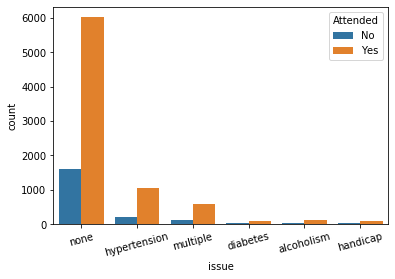

In [40]:
sb.countplot(data=subset_appointments, x='issue', hue='attended')
plt.xticks(rotation=15)
plt.legend(labels=['No', 'Yes'], title='Attended');

The above plot did not reveal any signs that health issues or age affect missing appointments. Even though, middle aged adults and patients who had no health issues had higher figures for attendance, that is largely due to the fact that those groups represent the majority of the records. So, we will dive deeper. In order to answer my main question, I have to find the proportions of attendance for every age group and issue.

In [71]:
def find_props(df):
    age_groups = ['children', 'teenagers', 'young adults', 'middle age adults', 'elderly', 'over 90']
    issues = ['hypertension', 'diabetes', 'alcoholism', 'handicap', 'none', 'multiple']
    age_group_dict = {}
    issue_group_dict = {}
    for column in ['age_groups', 'issue']:
        if column == 'age_groups':
            for group in age_groups:
                age_group_dict[group] = df[attended][df[attended][column] == group][column].shape[0] / df[df[column] == group][column].shape[0]
        elif column == 'issue':
            for group in issues:
                issue_group_dict[group] = df[attended][df[attended][column] == group][column].shape[0] / df[df[column] == group][column].shape[0]
    return age_group_dict, issue_group_dict

In [75]:
age, issue = find_props(subset_appointments)
age

{'children': 0.8025114155251142,
 'teenagers': 0.7196029776674938,
 'young adults': 0.7595180722891566,
 'middle age adults': 0.8069464544138929,
 'elderly': 0.846441947565543,
 'over 90': 0.7441860465116279,
 'hypertension': 0.8280757097791798,
 'diabetes': 0.8064516129032258,
 'alcoholism': 0.8,
 'handicap': 0.7946428571428571,
 'none': 0.7885497183283113,
 'multiple': 0.8218793828892006}

In [41]:
def find_prop_issue(attend, group):
    number_in_group = subset_appointments[subset_appointments.issue == group].shape[0]
    number_attended = subset_appointments[(subset_appointments.issue == group) & (attend)].shape[0]
    prop = number_attended / number_in_group
    return prop

In [44]:
find_prop_issue(attend=attended, group='hypertension')

0.8280757097791798

In [ ]:
subset_appointments.head()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!